In [982]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import zscore

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,LeaveOneOut
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.metrics import confusion_matrix
import seaborn as sns

import lightgbm as lgb

Q1 A - Import ‘signal-data.csv’ as DataFrame. 2.0 pts Python Pandas functions
Q1 B - Print 5 point summary and share at least 2 
observations.

In [769]:
signal=pd.read_csv(r'C:\Personal\AI\Featurization\signal-data.csv')

In [770]:
signal.shape

(1567, 592)

In [771]:
signal.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972  

In [772]:
signal.duplicated().sum()

0

there are no duplicates

In [773]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [774]:
signal.shape

(1567, 592)

In [775]:
summary=signal.describe()
pd.set_option('display.max_columns', None)
summary

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000   
mean    100.0   101.112908     0.121822     1.462862    -0.000841   
std       0.0     6.237214     0.008961     0.073897     0.015116   
min     100.0    82.131100     0.000000     1.191000    -0.053400   
25%     100.0    97.920000     0.121100     1.411200    -0.010800   
50%     100.0   101.512200     0.122400     1.461600    -0.001300   
75%     100.0   104.586700     0.123800     1.516900     0.008400   
max     100.0   129.252200     0.128600     1.656400     0.074900   

                10           11           12      13           14  \
count  1565.000000  1565.000000  1565.000000  1564.0  1564.000000   
mean      0.000146     0.964353   199.956809     0.0     9.005371   
std       0.009302     0.012452     3.257276     0.0     2.796596   
min      -0.034900     0.655400   182.094000     0.0     2.249300   
25%      -0.005600     0.958100   198.130700     0.0     7.094875   
50%       0.000400     0.965800   199.535600     0.0     8.967000   
75%       0.005900     0.971300   202.007100     0.0    10.861875   
max       0.053000     0.984800   272.045100     0.0    19.546500   

                15           16           17           18           19  \
count  1564.000000  1564.000000  1564.000000  1564.000000  1557.000000   
mean    413.086035     9.907603     0.971444   190.047354    12.481034   
std      17.221095     2.403867     0.012062     2.781041     0.217965   
min     333.448600     4.469600     0.579400   169.177400     9.877300   
25%     406.127400     9.567625     0.968200   188.299825    12.460000   
50%     412.219100     9.851750     0.972600   189.664200    12.499600   
75%     419.089275    10.128175     0.976800   192.189375    12.547100   
max     824.927100   102.867700     0.984800   215.597700    12.989800   

                20           21           22           23            24  \
count  1567.000000  1565.000000  1565.000000  1565.000000   1565.000000   
mean      1.405054 -5618.393610  2699.378435 -3806.299734   -298.598136   
std       0.016737   626.822178   295.498535  1380.162148   2902.690117   
min       1.179700 -7150.250000     0.000000 -9986.750000 -14804.500000   
25%       1.396500 -5933.250000  2578.000000 -4371.750000  -1476.000000   
50%       1.406000 -5523.250000  2664.000000 -3820.750000    -78.750000   
75%       1.415000 -5356.250000  2841.750000 -3352.750000   1377.250000   
max       1.453400     0.000000  3656.250000  2363.000000  14106.000000   

                25           26           27           28           29  \
count  1565.000000  1565.000000  1565.000000  1565.000000  1565.000000   
mean      1.203845     1.938477     6.638628    69.499532     2.366197   
std       0.177600     0.189495     1.244249     3.461181     0.408694   
min       0.000000     0.000000     0.000000    59.400000     0.666700   
25%       1.094800     1.906500     5.263700    67.377800     2.088900   
50%       1.283000     1.986500     7.264700    69.155600     2.377800   
75%       1.304300     2.003200     7.329700    72.266700     2.655600   
max       1.382800     2.052800     7.658800    77.900000     3.511100   

                30           31           32           33           34  \
count  1565.000000  15

column 0 have many outliers , Max value is 3356, and min value is 2743, standard deviation is 73.62
1 quantile(0.25)=2966.260000  3 quantile(0.75)=3056.650000 iqr = q3 - q1=101

low = q1 - 1.5 * iqr=2,814.76
high = q3 + 1.5 * iqr=3,208.06


column 1 have less outliers compared to column 0 , Max value is 2846.440000, and min value is 2158.750000, standard deviation is 80.407705
1 quantile(0.25)=2452.247500  3 quantile(0.75)=2538.822500 iqr = q3 - q1=86.573

low = q1 - 1.5 * iqr=2,364.167
high = q3 + 1.5 * iqr=2,626.895

Q2 A - Write a for loop which will remove all the 
features with 20%+ Null values and impute rest 
with mean of the feature

In [776]:
#null_percentage = signal.isnull().sum()/signal.shape[0]*100
#col_to_drop = null_percentage[null_percentage>20].keys()

#signal.drop(col_to_drop, axis=1,inplace=True)

for col in signal.columns:
    null_percentage = signal[col].isnull().sum()/(signal[col].shape[0]*100)
    col_to_drop=null_percentage[null_percentage>20]
    
signal.drop(col_to_drop, axis=1,inplace=True)

In [777]:
signal.shape

(1567, 592)

In [778]:
signal.fillna(signal.mean(), inplace=True)

In [779]:
signal.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

2B - Identify and drop the features which are 
having same value for all the rows.

In [780]:
cols = signal.select_dtypes([np.number]).columns
std = signal[cols].std()
cols_to_drop = std[std==0].index
signal.drop(cols_to_drop, axis=1,inplace=True)
signal.head()

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9      10      11        12       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41        43       44        45        46      47        48  \
0  61.29  4.515  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  78.25  2.773  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  14.37  5.434  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   
3  76.90  1.279  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427   
4  76.39  2.209  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882   

         50        51     53     54      55      56      57      58       59  \
0  624.3145  218.3174  4.592  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  631.2618  205.1695  4.590  4.842  2853.0  0.9324  0.9479  4.6820   0.8073   
2  637.2655  185.7574  4.486  4.748  2936.0  0.9139  0.9447  4.5873  23.8245   
3  637.3727  189.9079  4.486  4.748  2936.0  0.9139  0.9447  4.5873  24.3791   
4  667.7418  233.5491  4.624  4.894  2865.0  0.9298  0.9449  4.6414 -12.2945   

         60       61        62       63       64       65        66      67  \
0  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226   
1  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598   
2  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694   
3  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761   
4  355.0809   9.7948  144.0191  21.9782  32.2945  44.1498  745.6025  0.9256   

         68        70       71          72          73   74      75      76  \
0  148.6009  608.1700  84.0793  150.361552  468.020404  0.0  0.0126 -0.0206   
1  154.3709  620.3582  82.3494  150.361552  468.020404  0.0 -0.0039 -0.0198   
2  145.8000  625.9636  84.7681  140.697200  485.266500  0.0 -0.0078 -0.

Q2 C - Drop other features if required using 
relevant functional knowledge. Clearly justify the 
same.

In [781]:
signal.drop(['Time'],axis=1,inplace=True)

Dropped time feature as it can't predit much with it and dropped all <1% unique value features as these wont contribute much to output and Dropped all highly correlated features from dataset.

In [782]:
signal.isnull().any(axis = 1).sum()

0

2 D - Check for multi-collinearity in the data and 
take necessary action. 


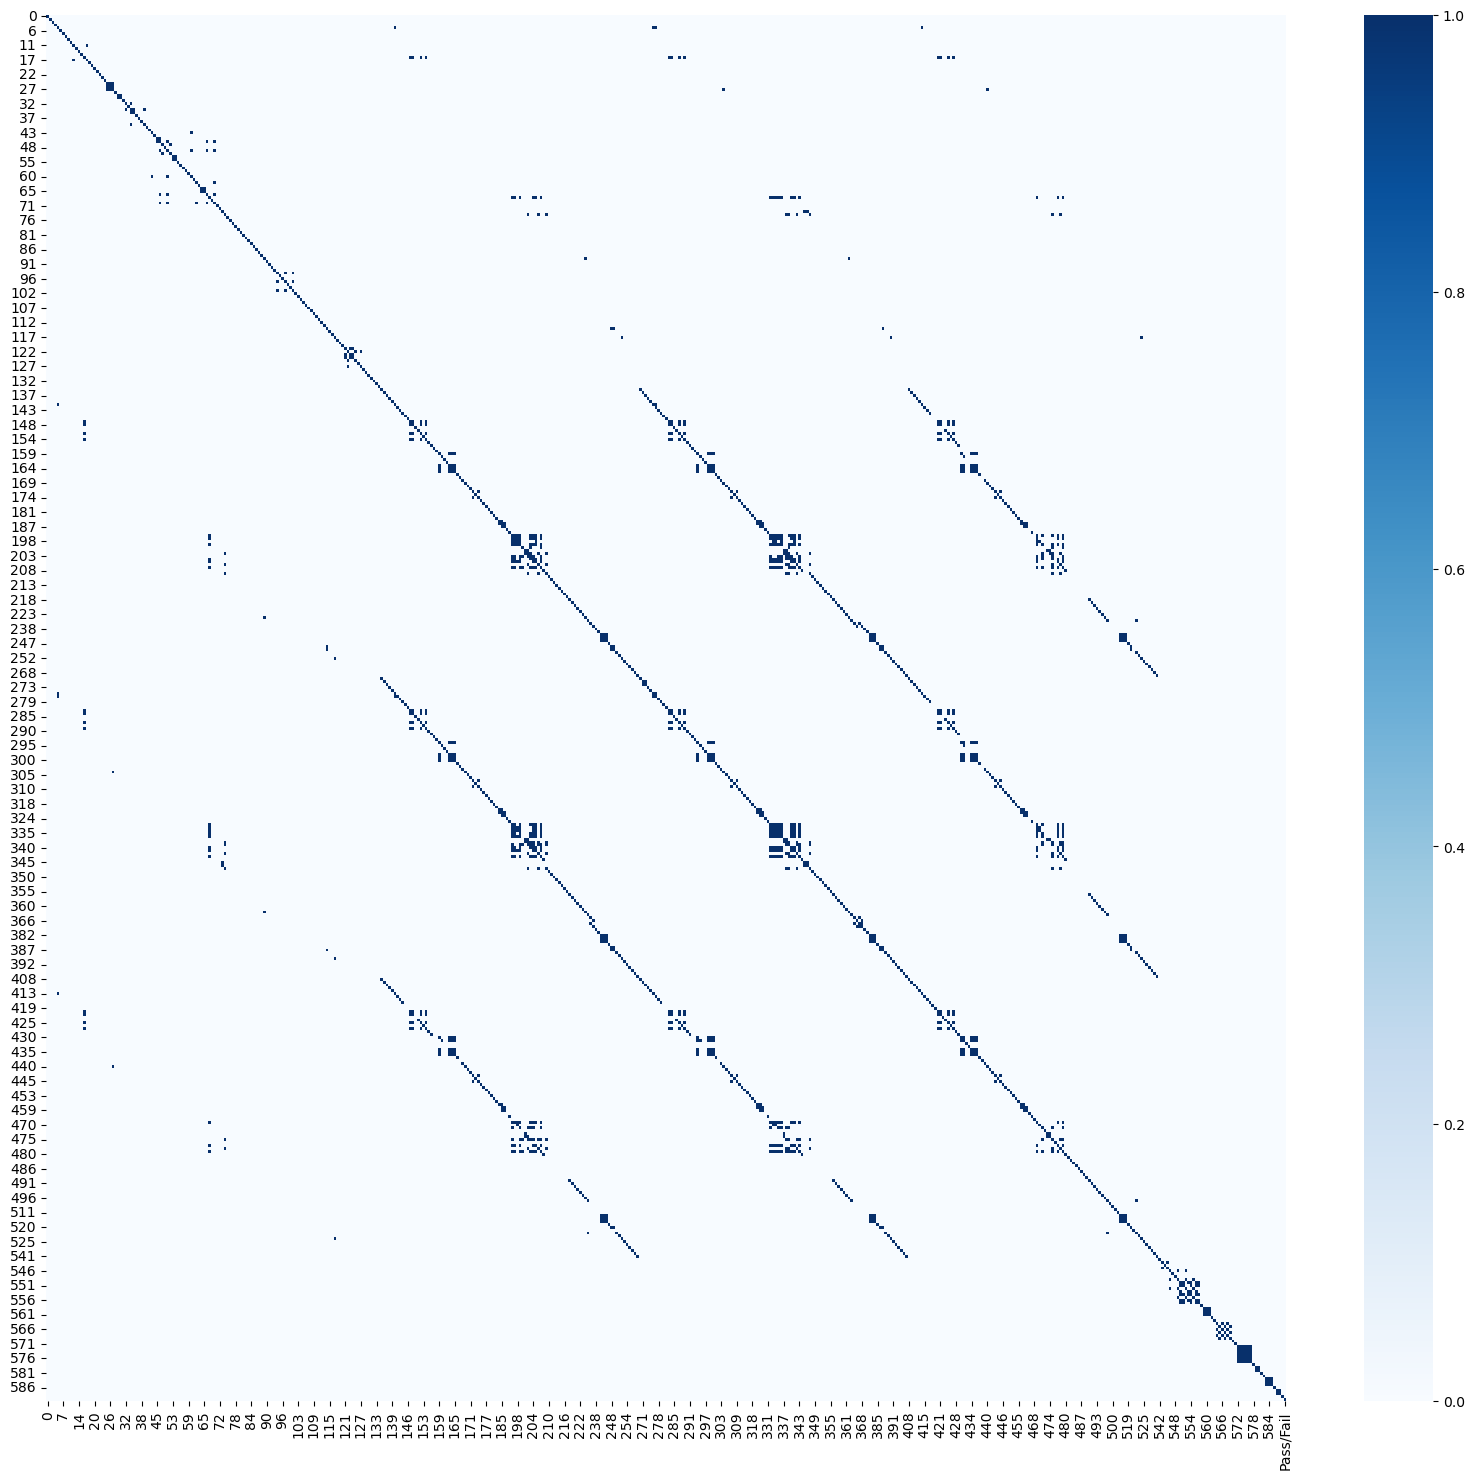

In [783]:
plt.figure(figsize=(20,18))
corr=signal.corr()
sns.heatmap(abs(corr>0.7),cmap="Blues");

In [784]:
corr_matrix = signal.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
signal.drop(to_drop, axis=1, inplace=True)

Dropping the columns with more than 70% of correlation.

In [785]:
signal.shape

(1567, 215)

After Dropping the correlation checking for the outliners

Q2 E - Make all relevant modifications on the data 
using both functional/logical 
reasoning/assumptions.
Q3 A - Perform a detailed univariate Analysis with 
appropriate detailed comments after each 
analysis
Q3 B - Perform bivariate and multivariate analysis 
with appropriate detailed comments after each 
analysis

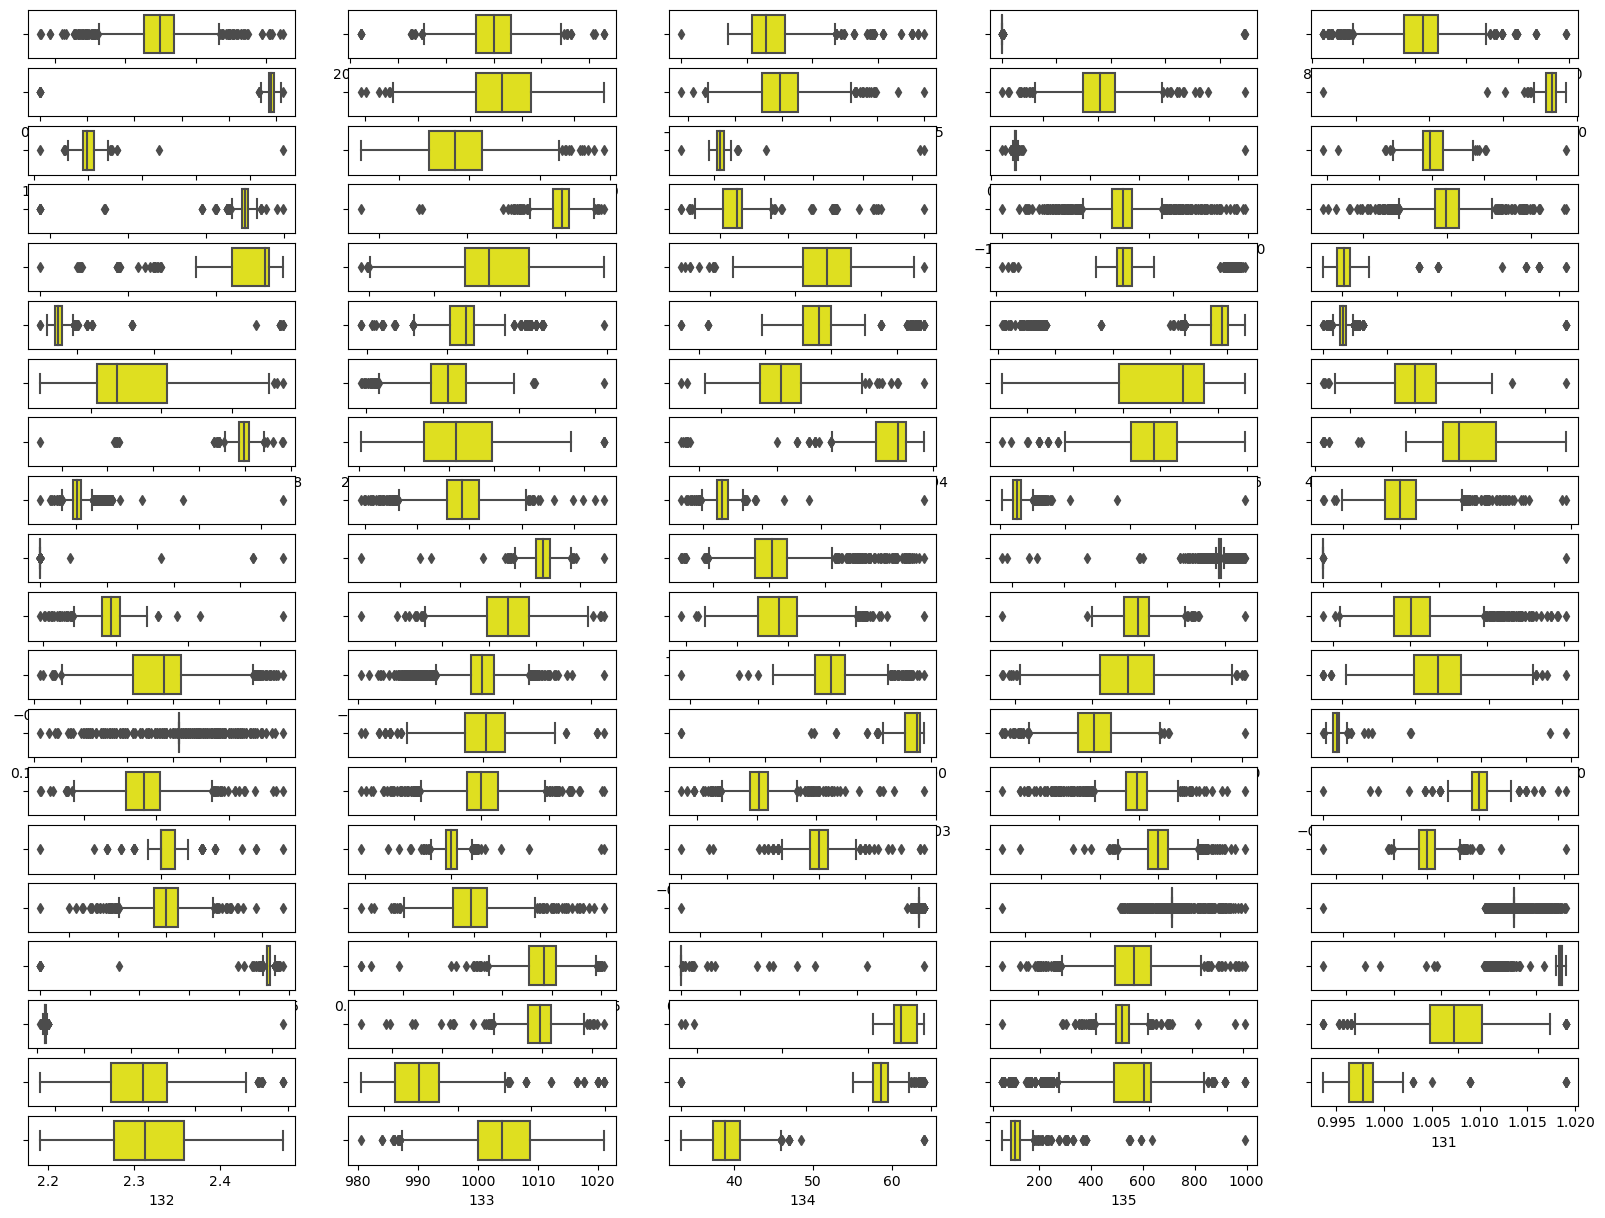

In [786]:
count=1
list1=list(signal.iloc[:,1:100]) 
plt.subplots(figsize=(20, 15))
for col in list1:
    plt.subplot(20,5,count)
    sns.boxplot(x=signal[col],color='Yellow')
    count+=1

plt.show()

Majority of the attributes have outliers, will be replacing them with the median

for i in signal.columns:
    q1 = signal[i].quantile(0.25)
    q3 = signal[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    signal.loc[(signal[i] < low) | (signal[i] > high), i] = signal[i].median()

#After treating the outlier values
count=1
list1=list(signal.iloc[:,1:100]) 
plt.subplots(figsize=(20, 15))
for col in list1:
    plt.subplot(20,5,count)
    sns.boxplot(x=signal[col], color='Yellow')
    count+=1

plt.show()
   

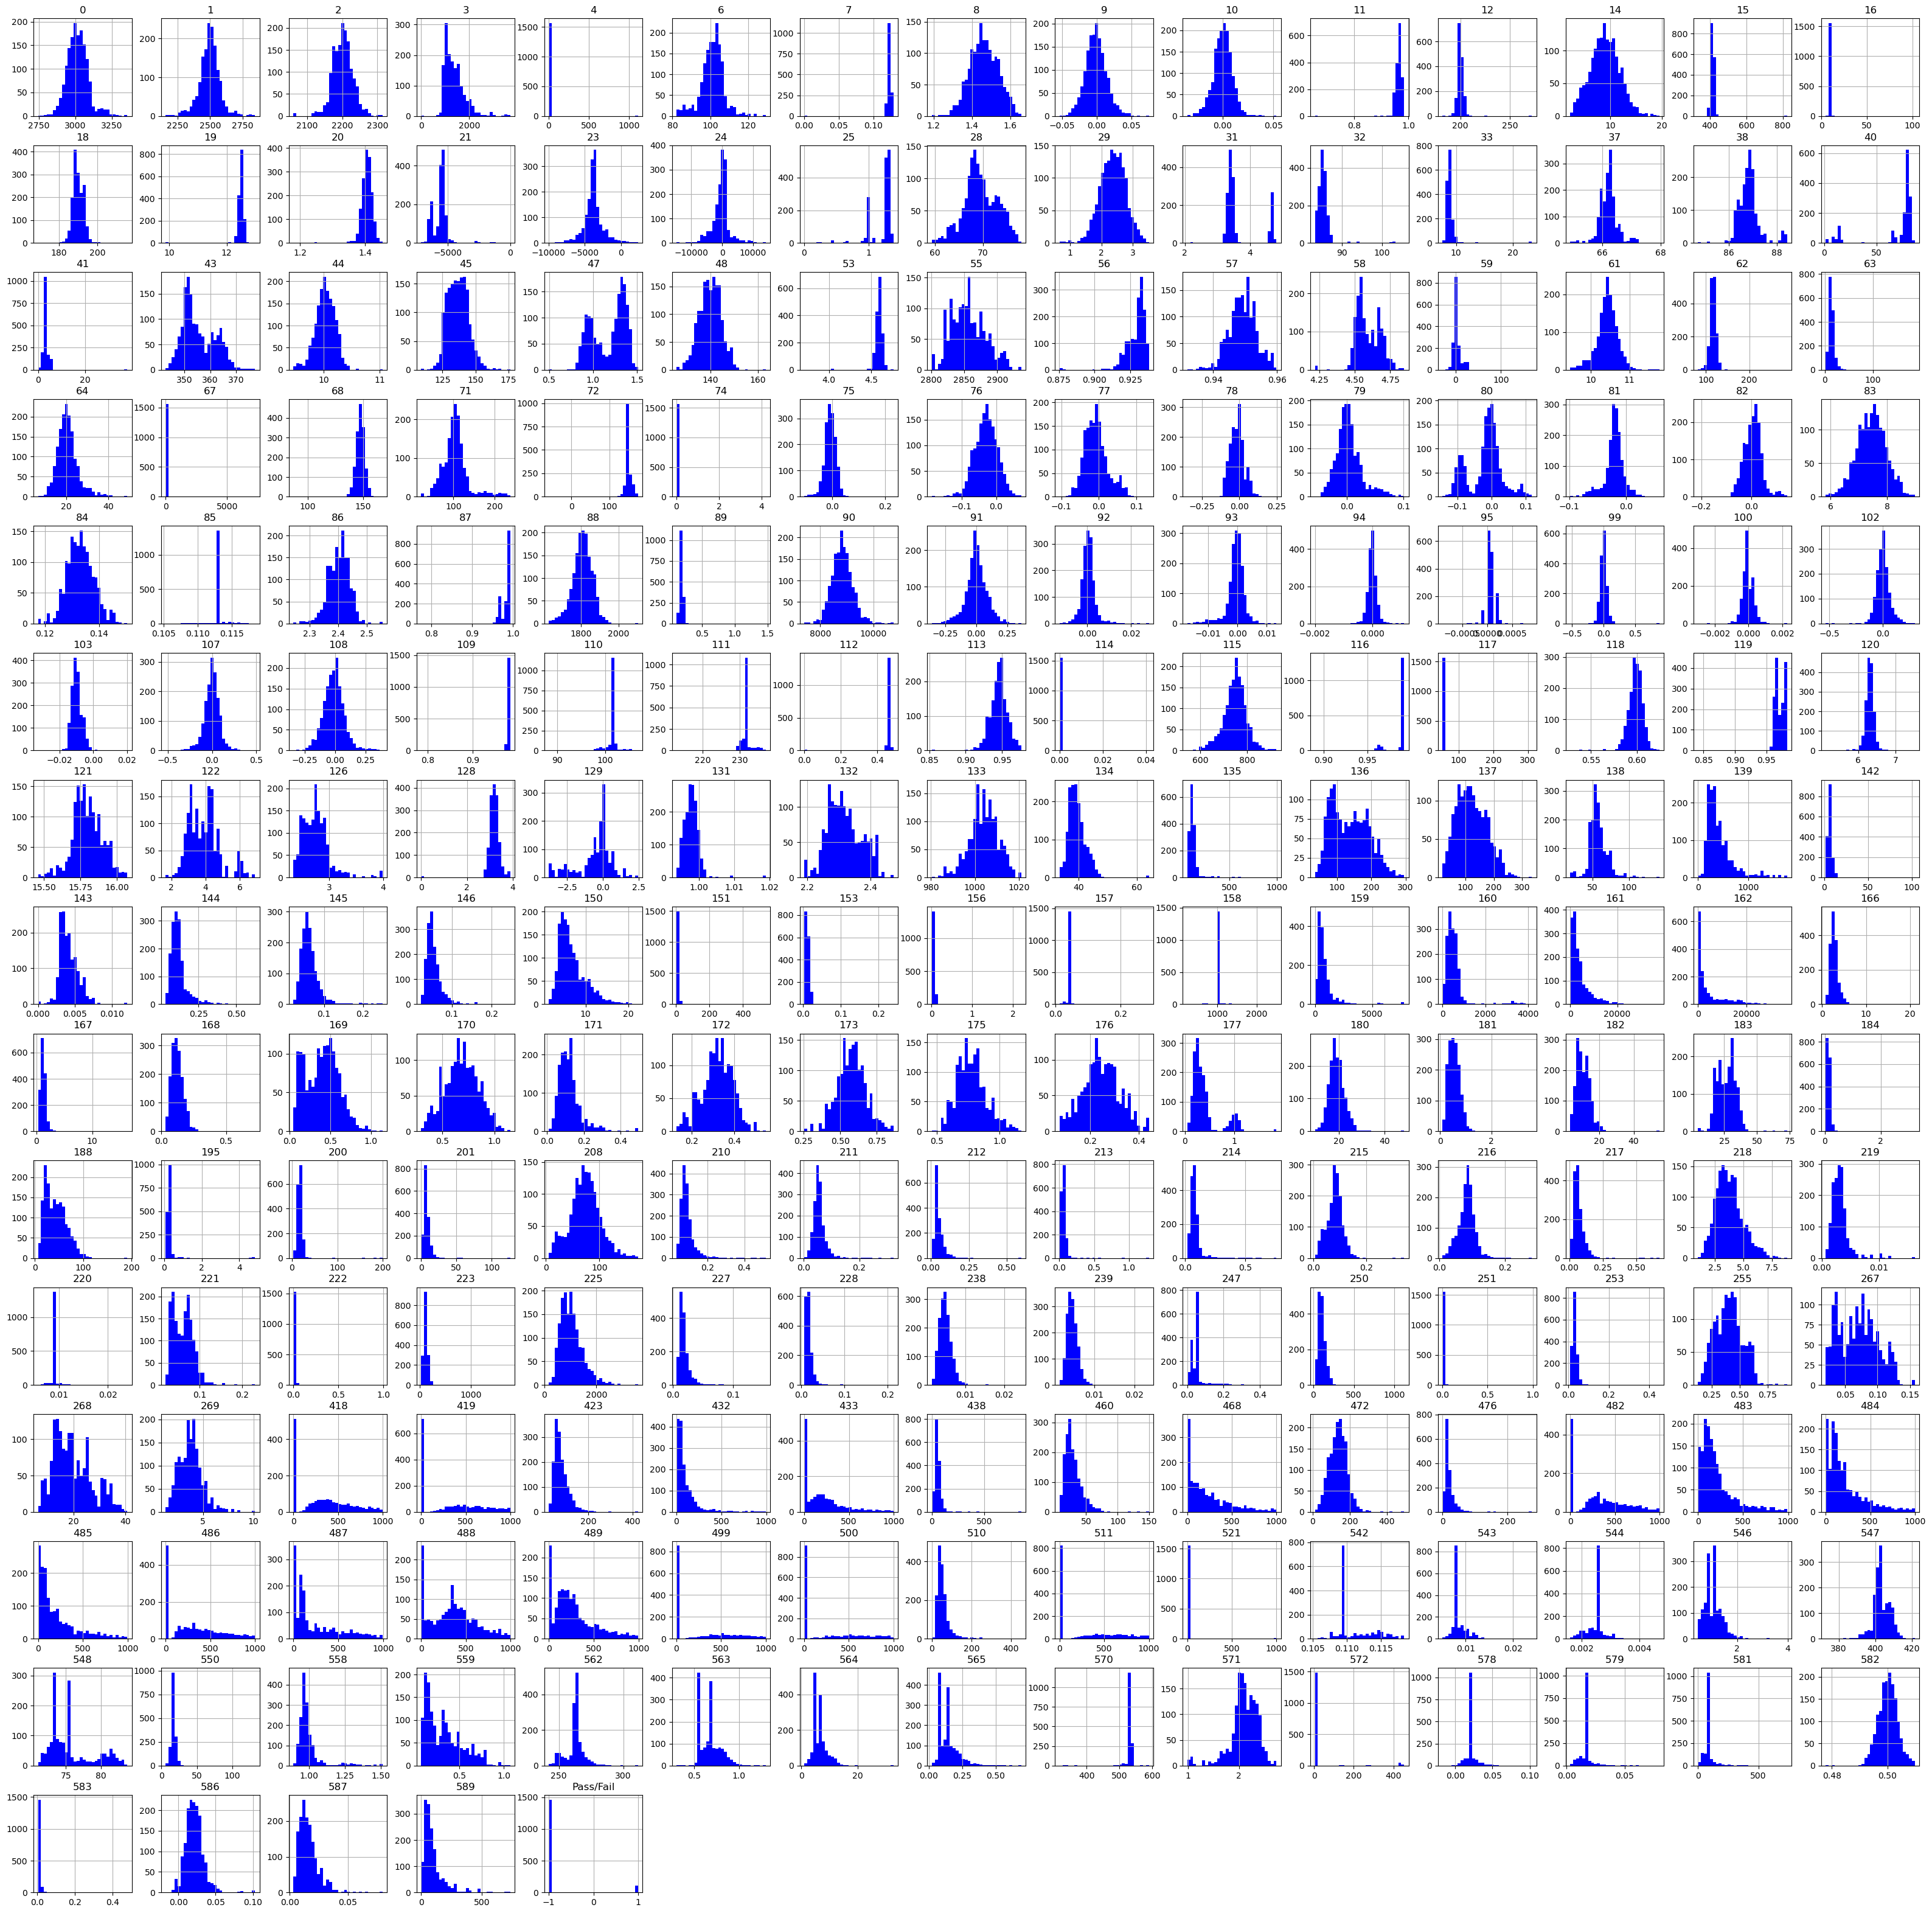

In [787]:
#plotting histogram to check for the frequency of values within a variable
signal.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

Some variables have still have 0 as a constant signal, will be drooping them after scaling with z-score

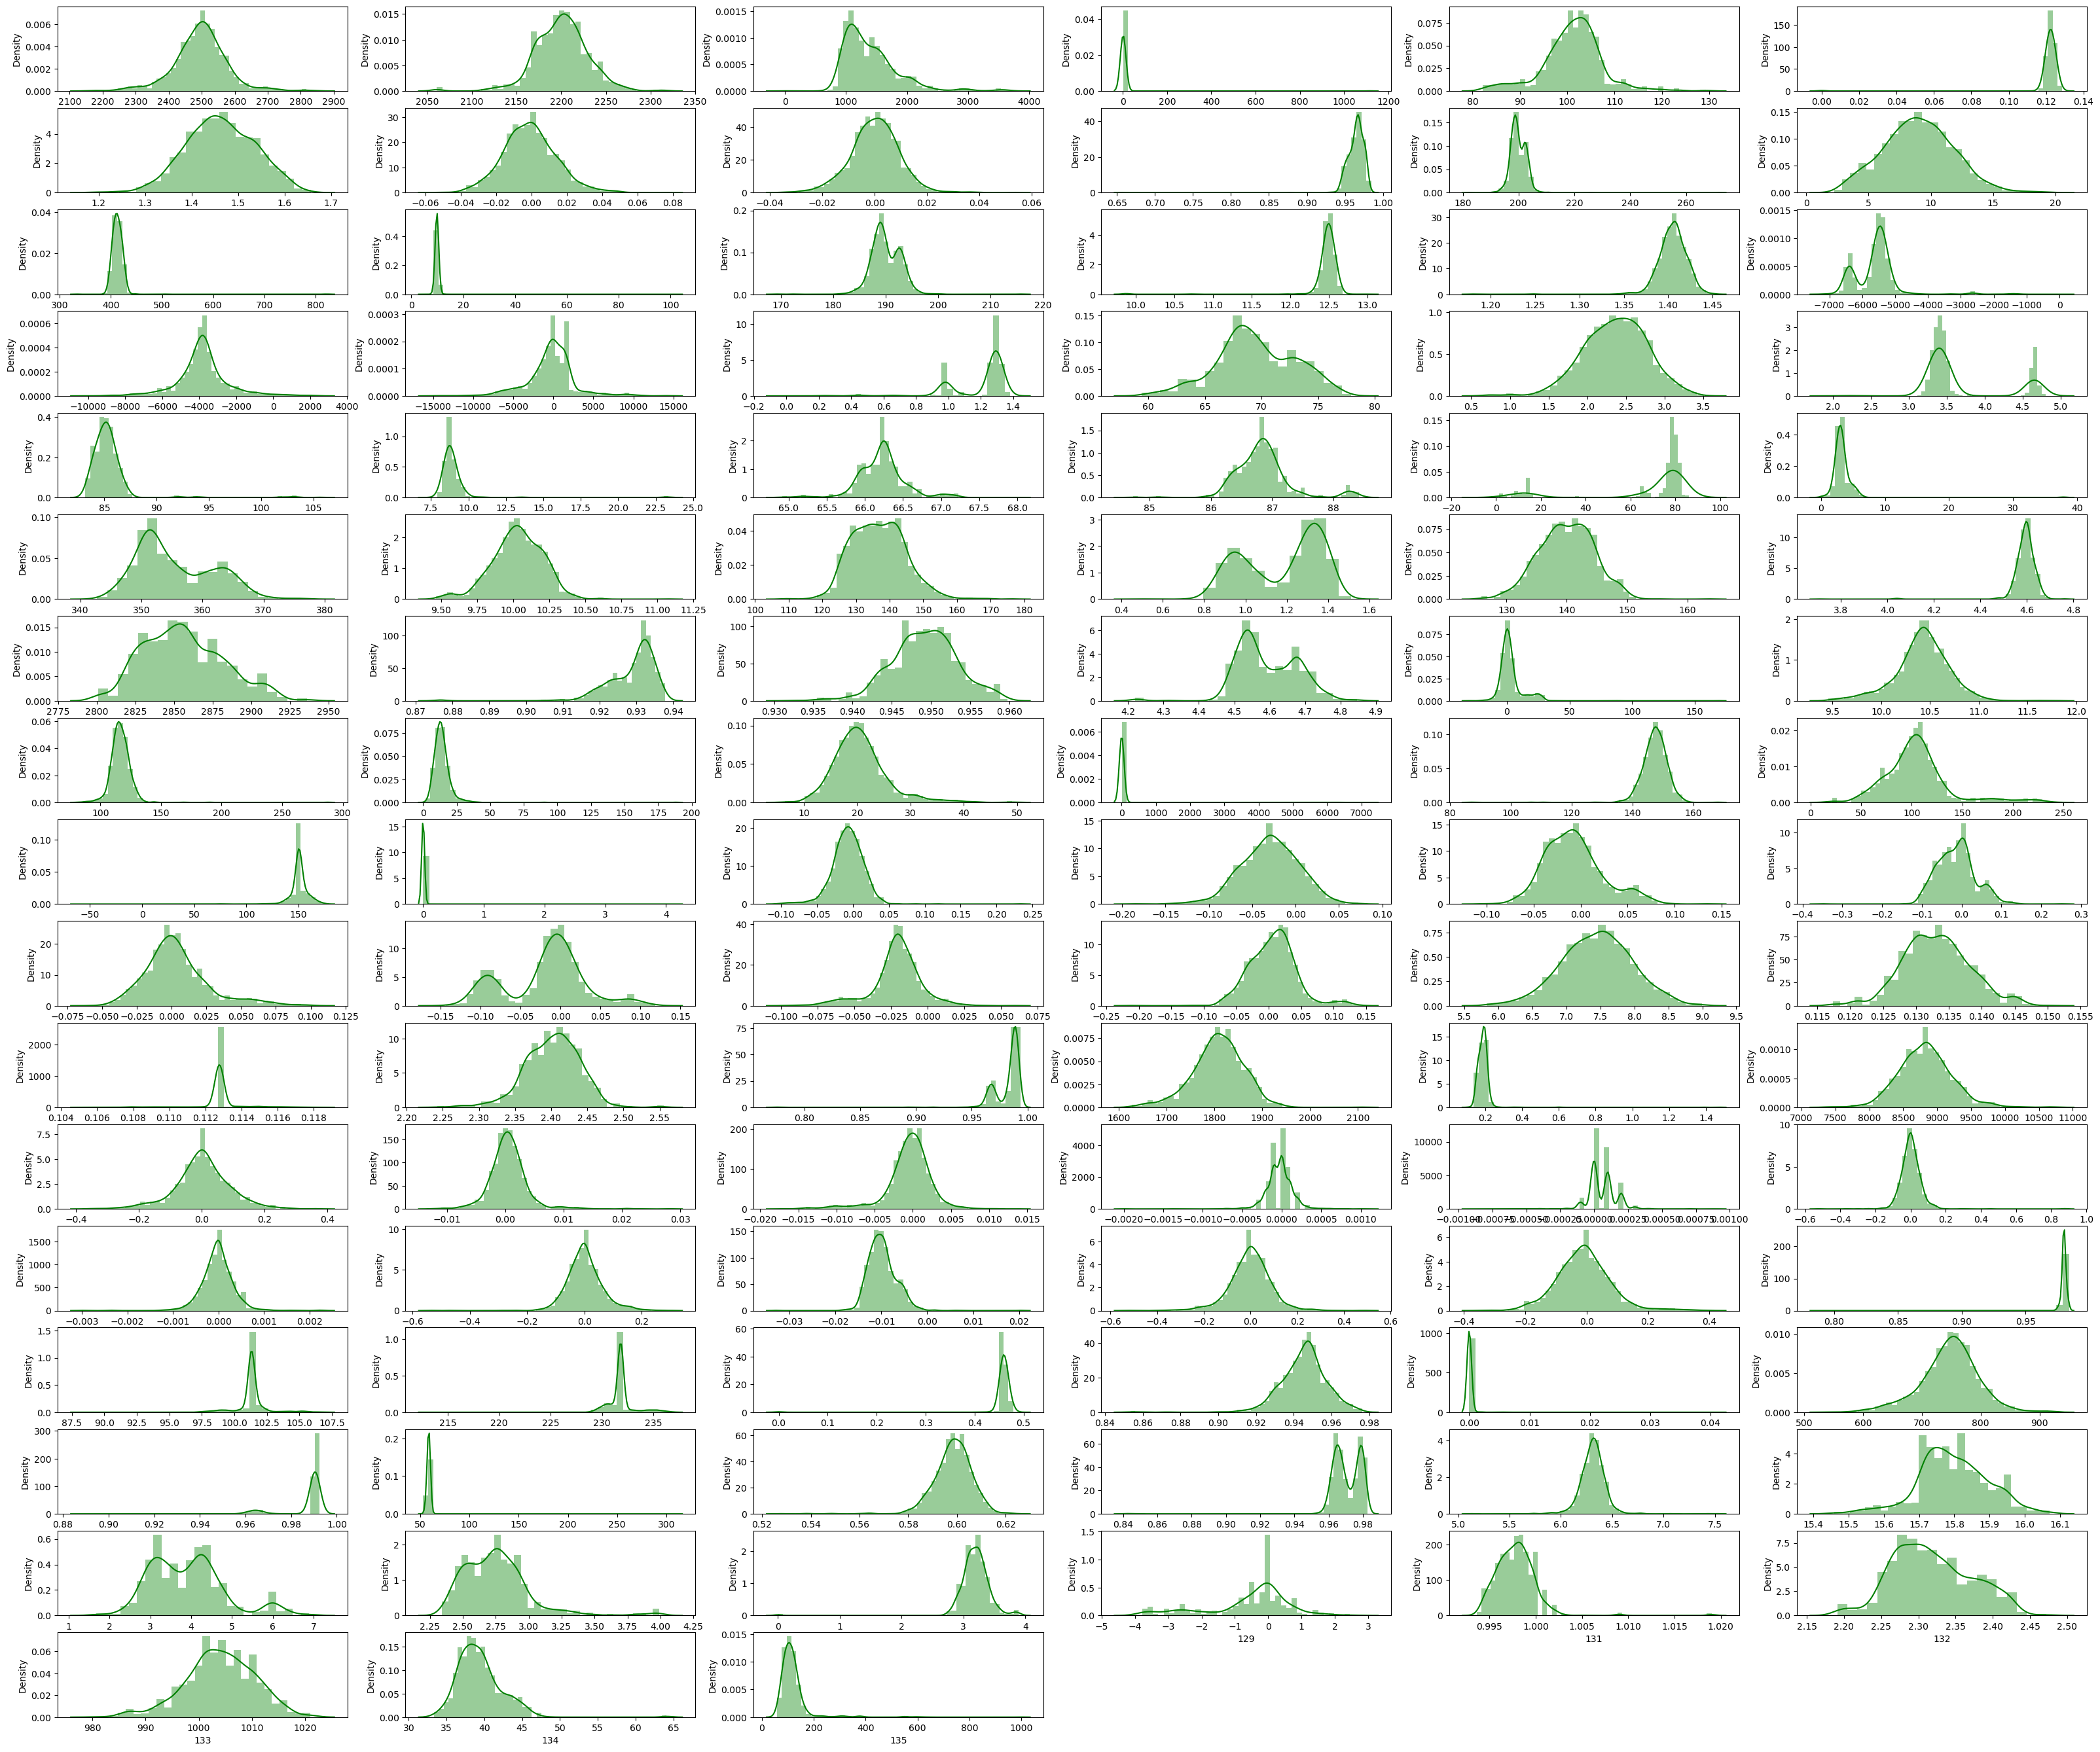

In [788]:
#density plot to check for the distribution of the variables
plt.figure(figsize=(40, 40))
list1=list(signal.iloc[:,1:100]) 
col = 1
for i in list1:
    plt.subplot(20, 6, col)
    sns.distplot(signal[i], color = 'Green')
    col += 1 

Majority of the variable seem to have a normal distribution

signalScaled= signal.apply(zscore)  
signalScaled.describe().T

Q4 A - Segregate predictors vs target attributes.
Q4 B - Check for target balancing and fix it if
found imbalanced. 

Target Variable is 'Pass/Fail'

All remianing varaibles are our predictor varaibles

In [789]:
signal['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [790]:
signal['Pass/Fail']=signal['Pass/Fail'].replace([-1,1],[0,1])


<Axes: >

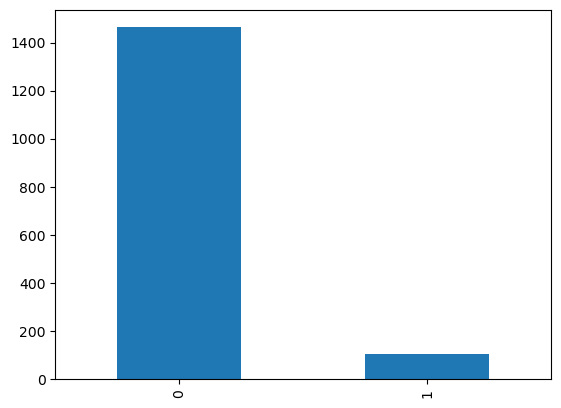

In [791]:
pd.value_counts(signal['Pass/Fail']).plot(kind="bar")

Target Variable data is imbalanced Pass Class Holds the data 93.3% where as Fail Classholds data of 6.6%.

In [807]:
X=signal.drop(['Pass/Fail'],axis=1)
y=signal['Pass/Fail']

In [808]:
signal1=X.apply(zscore)

In [809]:
signal1.head()

0         1         2         3         4         6         7  \
0  0.224309  0.849725 -0.436273  0.033555 -0.050580 -0.563790  0.266269   
1  1.107136 -0.382910  1.017137  0.153067 -0.060045  0.198217  0.322244   
2 -1.114158  0.799102 -0.481289  0.686213 -0.047906 -0.906210  0.255074   
3 -0.350312 -0.198875 -0.051547 -1.106948 -0.051290  0.503246 -0.013602   
4  0.242143  0.087526  1.117387 -0.158919 -0.047492 -0.115382  0.187905   

          8         9        10        11        12        14        15  \
0  0.509826  1.128417 -0.381543 -1.515481  0.762960 -0.375783  0.103782   
1  0.456999  0.022582 -1.608247 -0.132859  0.181365  0.411536  0.095858   
2 -0.260907  0.327183  0.124204 -0.229321  0.633372  0.182716  0.210561   
3  0.343218 -0.765408 -0.370782 -0.116782  0.581223  0.214760  0.535107   
4  0.545044 -0.149584 -0.790444 -0.599092  0.610171  0.558796  0.436445   

         16        18        19        20        21        23        24  \
0  0.056522  0.845709  0.174798 -0.146683  0.318407 -0.172210  0.361942   
1 -0.269787  0.446391 -0.093159 -1.348004  0.282478  0.223050 -0.462653   
2 -0.247086  0.956312  0.273326  0.433058  0.272497 -0.174567 -0.557914   
3 -0.089638  0.759084 -0.013048 -0.236334  0.239761 -0.513983 -0.468515   
4  0.179564  0.560343 -0.034687 -0.971470  0.226986 -0.131415  0.143314   

         25        28        29        31        32        33        37  \
0 -1.737835 -1.522972 -0.842506 -0.288120 -0.958086  0.411076  0.305404   
1  0.526715 -0.311560 -0.243685 -0.478843 -0.213439  0.624756 -4.283560   
2  0.610692 -0.684304 -0.080571 -0.139469 -0.286664 -0.224233 -1.258029   
3  0.619146 -1.898926  0.681363 -0.545782 -0.210822 -0.209422 -3.376163   
4  0.478245 -1.927846  1.933375 -0.748658  0.488546 -0.143330 -0.220675   

         38        40        41        43        44        45        47  \
0  0.266364 -0.277120  0.496231 -0.452853  0.874285 -0.812566  0.681958   
1  1.539908  0.433389 -0.247731 -0.528735  0.035072 -0.455157  0.584341   
2 -4.712242 -2.242749  0.888711  1.418662 -0.873885 -0.629808  0.639745   
3 -0.335692  0.376833 -0.885778  1.201850 -0.575472 -0.629808  0.658214   
4 -1.544955  0.355468 -0.488600 -0.352913  2.160544  5.044537 -0.759082   

         48        53        55        56        57        58        59  \
0  0.277786 -0.017703 -0.862453  0.419433 -0.195486  1.322854 -0.492923   
1  1.298783 -0.054158 -0.123389  0.522427 -0.315410  1.043896 -0.226438   
2  0.246003 -1.949828  3.105153 -2.199565 -1.082928 -0.070761  2.194423   
3  0.568516 -1.949828  3.105153 -2.199565 -1.082928 -0.070761  2.252754   
4 -0.416695  0.565580  0.343388  0.139877 -1.034958  0.566017 -1.604435   

         61        62        63        64        67        68        71  \
0  0.729073 -0.912878  0.303390  0.238540 -0.051474  0.274977 -0.641197   
1 -0.415452 -0.292963 -0.434592 -0.271798 -0.050700  1.638845 -0.695974   
2 -0.928465 -0.101633 -0.378507 -0.879523 -0.051647 -0.387078 -0.619387   
3 -0.772775 -0.037229 -0.060581 -0.991231 -0.051299  0.051274 -1.079763   
4 -2.291030  3.196010  1.124845  2.367169 -0.051464 -0.182947 -1.218682   

         72        74        75        76        77        78        79  \
0  0.000000 -0.025367  0.881947  0.266885  0.679417 -0.359188 -0.513581   
1  0.000000 -0.025367  0.135801  0.291173  0.239143 -0.639253 -1.714727   
2 -0.748777 -0.025367 -0.040561 -0.097443  0.059177  0.735805 -0.386914   
3  0.771641 -0.025367 -2.197602 -0.507312 -1.059183  1.129582  2.801582   
4  0.000000 -0.025367 -2.102638  1.447915 -0.310396 -0.658205 -0.002548   

         80        81        82        83        84            85        86  \
0  0.326238 -2.105246 -0.292155 -0.456981 -0.220247 -2.501348e-14 -0.331499   
1  0.133740 -0.979974 -0.121695 -1.255552  0.535174 -2.501348e-14 -0.709313   
2 -1.942777  0.174911  0.632803 -0.674456  0.614692 -2.501348e-14  1.375363   
3 -1.772805  1.418633  0.604859  0.272199 -0.578078 -2.501348e-14 -0.039430   
4  0.01

Q4 C - Perform train-test split and standardize the 
data or vice versa if required.

In [810]:
X_train, X_test, Y_train, Y_test =train_test_split(signal1,y, test_size=.30,random_state=105)

No Sampling, Trying with different MOdels

In [811]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))


#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 18.855688% (13.859672%)
KNN: 0.000000% (0.000000%)
GNB: 12.458512% (2.605781%)
SVM: 24.207489% (12.746682%)
DT: 14.549899% (13.737097%)
RF: 0.000000% (0.000000%)
AB: 3.538462% (7.151778%)
GBT: 4.040404% (8.131156%)
XGB: 0.000000% (0.000000%)


As the target data is Imbalances using Random Undersampling

In [813]:
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, Y_train)

In [821]:
print('Original X shape: ', X.shape)
print('Original y shape: ', y.shape)
print('Random Under X shape: ', X_train.shape)
print('Random Under y shape: ', Y_train.shape)

Original X shape:  (1567, 214)
Original y shape:  (1567,)
Random Under X shape:  (1096, 214)
Random Under y shape:  (1096,)


In [822]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))

Under Training Fail    : 71 (33.33%)
under Training Pass  : 142 (66.67%)


In [823]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))


#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 41.320513% (13.283216%)
KNN: 28.989899% (17.667992%)
GNB: 35.111663% (14.590971%)
SVM: 47.779221% (15.393955%)
DT: 46.553114% (13.525058%)
RF: 15.303030% (16.430528%)
AB: 38.110894% (14.200415%)
GBT: 33.461760% (14.740349%)
XGB: 28.088023% (20.521824%)
LightGBM: 34.635365% (19.801294%)


Smote upsampling

In [825]:
print("Before UpSampling, counts of label '0': {}".format(sum(Y_train==0)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(Y_train==1)))

oversample = SMOTE()   
X_train_res, y_train_res = oversample.fit_resample(X_train, Y_train.ravel())


print("After UpSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_train_res==1)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '0': 1025
Before UpSampling, counts of label '1': 71 

After UpSampling, counts of label '0': 1025
After UpSampling, counts of label '1': 1025 

After UpSampling, the shape of train_X: (2050, 214)
After UpSampling, the shape of train_y: (2050,) 



In [829]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))


#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 94.612964% (0.990501%)
KNN: 71.368154% (1.026111%)
GNB: 77.090357% (0.963470%)
SVM: 94.921568% (1.147102%)
DT: 92.172794% (2.044744%)
RF: 99.607346% (0.481881%)
AB: 93.493326% (1.630939%)
GBT: 97.876986% (0.774806%)
XGB: 99.126623% (0.524600%)


In [830]:
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)

In [831]:
print('Original X shape: ', X.shape)
print('Original y shape: ', y.shape)
print('Random over X shape: ',X_over.shape)
print('Random over y shape: ', y_over.shape)

Original X shape:  (1567, 214)
Original y shape:  (1567,)
Random over X shape:  (1537, 214)
Random over y shape:  (1537,)


In [832]:
print("Over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("Over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))

Over Training Fail    : 512 (33.31%)
Over Training Pass  : 1025 (66.69%)


In [833]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))


#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 89.942871% (2.222012%)
KNN: 83.826773% (2.836530%)
GNB: 56.112768% (0.715725%)
SVM: 90.349595% (2.069722%)
DT: 93.633736% (1.652633%)
RF: 100.000000% (0.000000%)
AB: 91.734491% (2.592189%)
GBT: 98.550886% (0.897854%)
XGB: 99.708738% (0.444910%)


we can come to conclusion the Smote works better 

In [877]:
x_tr, x_te, y_tr, y_te = train_test_split(X_train_res, y_train_res,test_size=0.2,train_size=0.8,random_state=1)
x_tra, x_cv, y_tra, y_cv = train_test_split(x_tr,y_tr,test_size = 0.25,train_size =0.75)

Q4 D - Check if the train and test data have 
similar statistical characteristics when compared 
with original data.

Q5 A - Use any Supervised Learning technique to 
train a model.

In [878]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_tra, y_tra)

DecisionTreeClassifier(random_state=1)

In [879]:
print('accuracy score of decision tree Train set is',dTree.score(x_tra, y_tra))
print('accuracy score of decision tree Test set is', dTree.score(x_te, y_te))

accuracy score of decision tree Train set is 1.0
accuracy score of decision tree Test set is 0.8585365853658536


In [880]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_tra, y_tra)

print('accuracy score of Pruned decision tree Train set is', dTreeR.score(x_tra, y_tra))
print('accuracy score of Pruned decision tree Test  set is',dTreeR.score(x_te, y_te))

accuracy score of Pruned decision tree Train set is 0.765040650406504
accuracy score of Pruned decision tree Test  set is 0.7


In [881]:
weights= pd.DataFrame({'feature': list(x_tra.columns), 'importance': dTreeR.feature_importances_}).sort_values('importance', ascending = False)
weights[weights['importance'] > 0]

feature  importance
41       59    0.361529
181     486    0.187155
138     201    0.186564
153     223    0.138865
33       45    0.103503
43       62    0.022384

In [882]:
zero_features = list(weights[weights['importance'] == 0.0]['feature'])
len(zero_features)

208

we have 6 features with non-zero importance and 208 features with zero importance

In [883]:
print(dTree.score(x_tra, y_tra))
print(dTree.score(x_te, y_te))

y_pred = dTree.predict(x_te)
print(classification_report(y_te, y_pred))
roc_auc_score(y_te, y_pred)

1.0
0.8585365853658536
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       205
           1       0.80      0.95      0.87       205

    accuracy                           0.86       410
   macro avg       0.87      0.86      0.86       410
weighted avg       0.87      0.86      0.86       410



0.8585365853658536

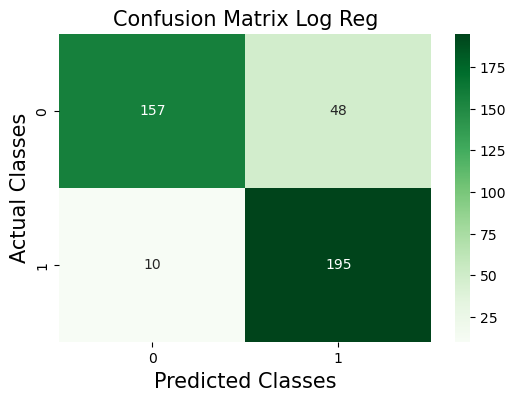

In [884]:
class_train_predict = dTree.predict(x_tra)
class_test_predict = dTree.predict(x_te)
cm=confusion_matrix(y_te, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

For the Sampling data

Q5 B - Use cross validation techniques.

In [885]:
nb = GaussianNB()
num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(nb, x_tra, y_tra, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.74193548 0.77419355 0.66129032 0.64516129 0.72580645 0.70967742
 0.72580645 0.80645161 0.72580645 0.70967742 0.7704918  0.67213115
 0.80327869 0.68852459 0.6557377  0.73770492 0.68852459 0.68852459
 0.68852459 0.81967213]
Accuracy: 72.195% (5.015%)


From K Fold Cross Validation we can observe average accuaracy is 72.19% and can get Max accuracy of 77%. 

In [886]:
num_folds = 20
seed = 7

Stratkfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)

results = cross_val_score(nb, x_tra, y_tra, cv=Stratkfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.72580645 0.77419355 0.74193548 0.72580645 0.79032258 0.69354839
 0.72580645 0.66129032 0.74193548 0.74193548 0.75409836 0.72131148
 0.72131148 0.73770492 0.72131148 0.67213115 0.81967213 0.68852459
 0.72131148 0.68852459]
Accuracy: 72.842% (3.731%)


From Startified K Fold Cross Validation we can observe average accuaracy is 72.84% and can get Max accuracy of 75.84%. 

In [887]:
loocv =LeaveOneOut()

results = cross_val_score(nb, x_tra, y_tra, cv=loocv)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0. 1. 1. ... 0. 1. 1.]
Accuracy: 72.602% (44.600%)


Average Accuracy we get from LOOCV is 72.60%. LOOCV is very costly shouldnt be used on large datasets

Q5 C - Apply hyper-parameter tuning techniques 
to get the best accuracy

In [888]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [889]:
kfold = KFold(n_splits=20, random_state=7,shuffle=True)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
print(params_NB)

# Random search of parameters
nb_random = RandomizedSearchCV(estimator = nb, 
                 param_distributions=params_NB, 
                 cv=kfold,  
                 verbose=1, 
                 scoring='accuracy')
# Fit the random search model
nb_random.fit(x_cv, y_cv)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

RandomizedSearchCV(cv=KFold(n_splits=20, random_state=7, shuffle=True),
                   estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='accuracy', verbose=1)

In [890]:
RandomizedSearchCV(cv=KFold(n_splits=20, random_state=7, shuffle=True),
                   estimator=GaussianNB(),
                   param_distributions={'var_smoothing':params_NB },
                   scoring='accuracy', verbose=1)

RandomizedSearchCV(cv=KFold(n_splits=20, random_state=7, shuffle=True),
                   estimator=GaussianNB(),
                   param_distributions={'var_smoothing': {'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}},
                   scoring='accuracy', verbose=1)

In [891]:
print('Naive Bayes - Best Parameters: ',nb_random.best_params_)

Naive Bayes - Best Parameters:  {'var_smoothing': 0.0002848035868435802}


In [892]:
print(nb_random.score(x_cv, y_cv))
print(nb_random.score(x_te, y_te))

y_pred = nb_random.predict(x_te)
print(classification_report(y_te, y_pred))
roc_auc_score(y_te, y_pred)

0.7878048780487805
0.748780487804878
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       205
           1       0.68      0.93      0.79       205

    accuracy                           0.75       410
   macro avg       0.78      0.75      0.74       410
weighted avg       0.78      0.75      0.74       410



0.748780487804878

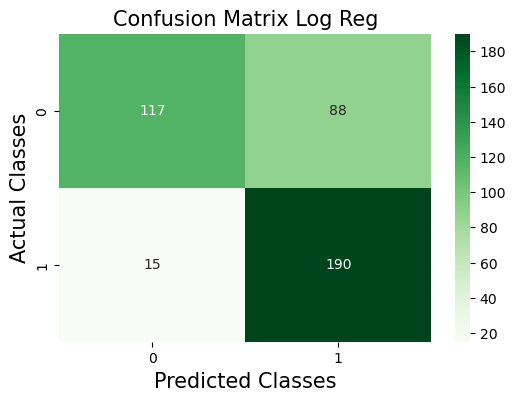

In [905]:
class_train_predict = nb_random.predict(x_te)
class_test_predict = nb_random.predict(x_te)

cm=confusion_matrix(y_te, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

In [911]:
nb = GaussianNB()
kfold = KFold(n_splits=20, random_state=7,shuffle=True)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_grid = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=kfold, 
                 verbose=1, 
                 scoring='accuracy') 
nb_grid.fit(x_cv, y_cv)

nb_grid.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


{'var_smoothing': 0.001873817422860383}

In [913]:
print(nb_grid.score(x_cv, y_cv))
print(nb_grid.score(x_te, y_te))

y_pred = nb_grid.predict(x_te)
print(classification_report(y_te, y_pred))
roc_auc_score(y_te, y_pred)

0.7878048780487805
0.748780487804878
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       205
           1       0.68      0.93      0.79       205

    accuracy                           0.75       410
   macro avg       0.78      0.75      0.74       410
weighted avg       0.78      0.75      0.74       410



0.748780487804878

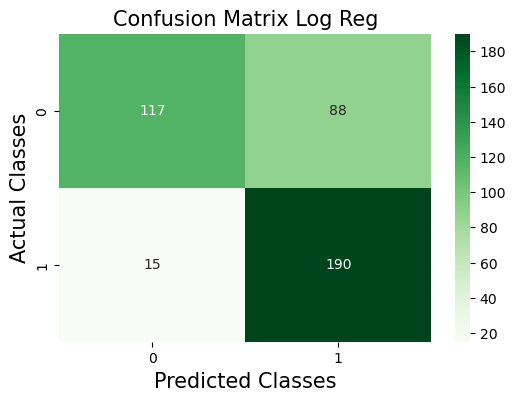

In [908]:
class_train_predict = nb_grid.predict(x_te)
class_test_predict = nb_grid.predict(x_te)
cm=confusion_matrix(y_te, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

In [916]:
feature_importances = np.zeros(x_tra.shape[1])


model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [917]:
model.fit(x_tra, y_tra, early_stopping_rounds=100, eval_set = [(x_cv, y_cv)], 
              eval_metric = 'auc', verbose = 200)
    

feature_importances += model.feature_importances_

[200]	valid_0's auc: 0.99812	valid_0's binary_logloss: 0.0578999


In [918]:
feature_importances = pd.DataFrame({'feature': list(x_tra.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head(5)

feature  importance
41       59        71.0
198     559        62.0
26       33        48.0
45       64        47.0
13       15        47.0

In [919]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 4 features with 0.0 importance


feature  importance
150     220         1.0
114     158         0.0
50       74         0.0
189     521         0.0
83      114         0.0

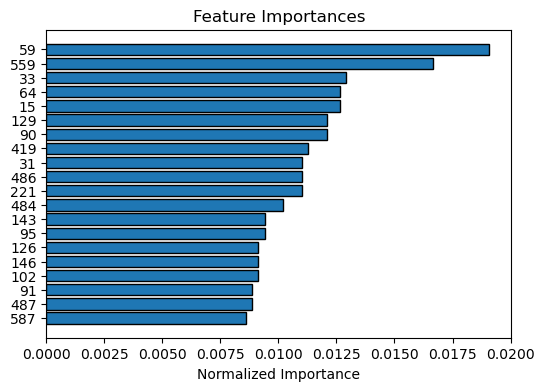

In [920]:
df = feature_importances.sort_values('importance', ascending = False).reset_index()
    
df['importance_normalized'] = df['importance'] / df['importance'].sum()
plt.figure(figsize = (6, 4))
ax = plt.subplot()
ax.barh(list(reversed(list(df.index[:20]))), 
df['importance_normalized'].head(20), align = 'center', edgecolor = 'k')
ax.set_yticks(list(reversed(list(df.index[:20]))))
ax.set_yticklabels(df['feature'].head(20))
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()

5 D - Use any other technique/method which 
can enhance the model performance.
Q5 E - Display and explain the classification report in detail.
Q5 F - Apply the above steps for all possible models that you have learnt so far.
Q6 A- Display and compare all the models designed with their train and test accuracies.
Q6 B - Select the final best trained model along with your detailed comments for selecting this model.
Q6 C - Write your conclusion on the results.

In [923]:
pca = PCA(random_state=42)
pca.fit(X)
pca.explained_variance_

array([4.31926644e+07, 1.79057745e+07, 8.23956323e+06, 1.98829483e+06,
       1.11537463e+06, 2.35858220e+05, 2.09167373e+05, 1.92522072e+05,
       1.80279713e+05, 1.53527773e+05, 1.13484410e+05, 1.08668273e+05,
       1.04472460e+05, 1.00153670e+05, 9.28945280e+04, 8.32355448e+04,
       8.18078308e+04, 7.68222720e+04, 6.65283344e+04, 6.35821681e+04,
       5.63577900e+04, 5.11358243e+04, 5.02459695e+04, 4.53475685e+04,
       4.39411318e+04, 4.11147073e+04, 3.54030754e+04, 1.34133824e+04,
       1.12697242e+04, 1.05275836e+04, 9.66482101e+03, 7.30186576e+03,
       7.05669689e+03, 5.15973065e+03, 3.98156147e+03, 3.21193507e+03,
       3.14800800e+03, 3.10847983e+03, 2.63052421e+03, 2.30335522e+03,
       1.77433675e+03, 1.54198326e+03, 1.33239702e+03, 1.29122974e+03,
       1.15909609e+03, 1.02408862e+03, 9.32294448e+02, 8.82658737e+02,
       8.04312405e+02, 7.36079786e+02, 6.78038957e+02, 6.16936226e+02,
       5.34762340e+02, 4.47091698e+02, 3.31223813e+02, 2.00174225e+02,
      

In [924]:
pd.DataFrame(pca.components_)

0             1             2             3             4    \
0    7.158172e-04 -2.008937e-05 -2.642865e-04  2.877017e-03 -1.499300e-04   
1    1.302715e-04  7.314360e-04 -1.761788e-04 -1.445733e-03 -2.028513e-04   
2   -1.113570e-04 -1.710267e-03 -3.325916e-04 -6.819607e-03 -3.332760e-04   
3    2.735292e-03  2.717252e-04 -3.909143e-04  6.203361e-03 -2.827065e-04   
4   -5.130722e-04  3.935382e-03  3.368634e-04 -2.359670e-02 -2.126836e-04   
..            ...           ...           ...           ...           ...   
209  3.430048e-07  3.960973e-07 -7.663456e-07  2.309024e-08  4.011006e-08   
210 -1.200881e-07  5.535332e-08 -3.027937e-07  1.597463e-08 -2.323950e-07   
211 -1.084796e-07 -9.738347e-09  1.455147e-07  3.402003e-09  1.466706e-07   
212 -8.104689e-08 -7.071521e-08  2.181177e-08  1.059787e-08 -1.112775e-07   
213 -5.445300e-09  3.073112e-08 -1.082799e-08  3.244164e-09  4.162606e-09   

              5             6             7             8             9    \
0   -8.709980e-05  4.258686e-08 -3.389793e-07 -3.206056e-08 -5.280012e-09   
1   -1.682456e-06  5.439149e-08  4.817899e-07 -1.334328e-07  2.637589e-09   
2    9.434784e-05  4.168393e-08 -1.173006e-07  5.820970e-08 -5.345232e-08   
3   -1.041038e-04  8.772602e-08 -1.800932e-06  8.036729e-07  1.030828e-07   
4    2.455457e-04 -9.719753e-08  5.036231e-06 -1.987825e-07  6.456982e-07   
..            ...           ...           ...           ...           ...   
209  3.162071e-06 -2.018219e-03 -5.404949e-04 -1.395421e-03 -1.439676e-03   
210  8.781743e-07  2.956835e-04  1.340847e-04 -2.203430e-05  2.302713e-04   
211  1.207973e-06 -2.953108e-04 -8.284226e-05 -2.664159e-04 -5.975141e-04   
212  1.992397e-06 -1.327250e-03 -1.815822e-05  4.626316e-04 -1.179614e-03   
213  1.091644e-06 -1.339992e-04  2.803123e-05 -5.951107e-04  2.705795e-04   

              10        11        12            13        14        15   \
0    1.293150e-07 -0.000008 -0.000010  8.569152e-05 -0.000009  0.000001   
1   -1.892308e-07 -0.000012 -0.000025  6.663316e-05 -0.000009 -0.000003   
2   -2.030367e-07  0.000051  0.000026  1.689593e-04  0.000013  0.000039   
3    2.988180e-07  0.000101 -0.000039  3.155430e-04  0.000044  0.000057   
4   -5.579267e-07 -0.000019 -0.000016  1.833302e-05  0.000013 -0.000031   
..            ...       ...       ...           ...       ...       ...   
209  1.682207e-03  0.000008 -0.000005 -1.055698e-06 -0.000004  0.000003   
210 -1.153606e-03  0.000026  0.000006  2.065465e-08 -0.000025 -0.000023   
211  5.682210e-04 -0.000019  0.000006 -2.062225e-07  0.000019  0.000017   
212  5.166249e-04 -0.000037  0.000003 -4.207594e-07  0.000038  0.000038   
213  2.171207e-04 -0.000035  0.000003 -1.333481e-07  0.000035  0.000035   

              16            17            18            19            20   \
0    5.592248e-07  2.403462e-07  1.697059e-02 -9.415662e-04 -7.355061e-02   
1   -4.932146e-07  2.305252e-08 -1.019489e-02  4.802058e-02 -1.201866e-02   
2    3.131139e-06 -6.351814e-08 -3.505176e-02  1.874868e-02  9.962258e-01   
3    8.772952e-07 -9.905258e-08 -1.624937e-01 -9.251175e-01  8.597874e-03   
4   -8.326570e-07  1.421387e-06  3.383907e-01 -3.743749e-01  2.492704e-02   
..            ...           ...           ...           ...           ...   
209 -9.070357e-05 -3.795611e-04 -4.888599e-08  1.917752e-08 -6.250232e-09   
210  8.199184e-06  4.387595e-05 -3.034120e-08  7.748981e-09  2.190141e-09   
211  1.669355e-05  6.293320e-04 -8.678257e-10 -4.151493e-09  1.540744e-09   
212  6.717269e-06  5.648177e-04 -6.328631e-10  7.927970e-10 -1.378803e-09   
213 -6.688592e-06  4.192979e-04  1.265372e-10 -6.145262e-10  9.961532e-11   

          21        22            23        24            25            26   \
0    0.000010  0.000106 -2.404795e-05 -0.000030 -9.392761e-06 -1.000250e-05   
1   -0.000002 -0.000038  8.276466e-06  0.000010 -7.490716e-06 -8.065744e-06   
2   -0.000011 -0.000021 -7.335177e-06  0.000045 -9.876301e-06  4.443292e-06   
3    0.000026  0.00017

In [925]:
total = []
k=1
for i in pca.explained_variance_ratio_*100:
    total.append(i)
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k=k+1

Variance explained by Principle Component 1 is : 57.80%
Variance explained by Principle Component 2 is : 23.96%
Variance explained by Principle Component 3 is : 11.03%
Variance explained by Principle Component 4 is : 2.66%
Variance explained by Principle Component 5 is : 1.49%
Variance explained by Principle Component 6 is : 0.32%
Variance explained by Principle Component 7 is : 0.28%
Variance explained by Principle Component 8 is : 0.26%
Variance explained by Principle Component 9 is : 0.24%
Variance explained by Principle Component 10 is : 0.21%
Variance explained by Principle Component 11 is : 0.15%
Variance explained by Principle Component 12 is : 0.15%
Variance explained by Principle Component 13 is : 0.14%
Variance explained by Principle Component 14 is : 0.13%
Variance explained by Principle Component 15 is : 0.12%
Variance explained by Principle Component 16 is : 0.11%
Variance explained by Principle Component 17 is : 0.11%
Variance explained by Principle Component 18 is : 0.10

In [926]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.57801074, 0.81762852, 0.92789159, 0.95449925, 0.96942537,
       0.97258166, 0.97538077, 0.97795712, 0.98036965, 0.98242419,
       0.98394285, 0.98539707, 0.98679513, 0.98813541, 0.98937853,
       0.9904924 , 0.99158717, 0.99261522, 0.99350551, 0.99435637,
       0.99511056, 0.99579487, 0.99646727, 0.99707412, 0.99766214,
       0.99821235, 0.99868612, 0.99886562, 0.99901643, 0.99915731,
       0.99928665, 0.99938436, 0.9994788 , 0.99954784, 0.99960113,
       0.99964411, 0.99968624, 0.99972783, 0.99976304, 0.99979386,
       0.9998176 , 0.99983824, 0.99985607, 0.99987335, 0.99988886,
       0.99990257, 0.99991504, 0.99992685, 0.99993762, 0.99994747,
       0.99995654, 0.9999648 , 0.99997195, 0.99997794, 0.99998237,
       0.99998505, 0.99998691, 0.99998854, 0.99999001, 0.99999145,
       0.9999926 , 0.99999348, 0.99999414, 0.99999476, 0.99999531,
       0.99999585, 0.99999631, 0.99999672, 0.99999704, 0.99999733,
       0.9999976 , 0.99999784, 0.99999807, 0.99999829, 0.99999

In [931]:
pca_17 = PCA(n_components=17)  #specifying 11 PC components
pca_17.fit(X)

pd.DataFrame(pca_17.components_)

0         1         2         3         4         5             6    \
0   0.000716 -0.000020 -0.000264  0.002877 -0.000150 -0.000087  4.258686e-08   
1   0.000130  0.000731 -0.000176 -0.001446 -0.000203 -0.000002  5.439149e-08   
2  -0.000111 -0.001710 -0.000333 -0.006820 -0.000333  0.000094  4.168393e-08   
3   0.002735  0.000272 -0.000391  0.006203 -0.000283 -0.000104  8.772602e-08   
4  -0.000513  0.003935  0.000337 -0.023597 -0.000213  0.000246 -9.719753e-08   
5  -0.000603  0.004244  0.009566  0.432820 -0.001491 -0.004426 -1.699980e-07   
6   0.003326  0.006371 -0.004081 -0.359980  0.003648  0.003498 -8.244797e-07   
7   0.002408 -0.003985  0.012712  0.688592 -0.006131 -0.006949  1.647261e-06   
8  -0.004487  0.003963  0.009930  0.370590 -0.001562 -0.003790  4.145110e-07   
9   0.000862  0.005965  0.004321  0.022165 -0.002025 -0.000493 -2.200518e-08   
10 -0.012437  0.009456  0.004549  0.046118 -0.000950  0.000049 -1.144116e-06   
11  0.001662  0.000980  0.000872  0.076350 -0.001686  0.000107 -1.067649e-07   
12  0.003667  0.002240  0.004347  0.018669 -0.001465  0.000298 -6.499235e-07   
13 -0.003780 -0.007102  0.001170  0.014911 -0.000970  0.000085  8.441748e-07   
14 -0.007993  0.000009 -0.004669 -0.027659 -0.000034  0.000403  5.222979e-07   
15  0.000088  0.004272 -0.002519 -0.013239  0.004059  0.000540 -2.645648e-07   
16  0.003769  0.010036 -0.003045 -0.003791 -0.007193 -0.000435  1.152812e-06   

             7             8             9             10        11   \
0  -3.389793e-07 -3.206056e-08 -5.280012e-09  1.293150e-07 -0.000008   
1   4.817899e-07 -1.334328e-07  2.637589e-09 -1.892308e-07 -0.000012   
2  -1.173006e-07  5.820970e-08 -5.345232e-08 -2.030367e-07  0.000051   
3  -1.800932e-06  8.036729e-07  1.030828e-07  2.988180e-07  0.000101   
4   5.036231e-06 -1.987825e-07  6.456982e-07 -5.579267e-07 -0.000019   
5  -1.517238e-05  2.309491e-06  3.418147e-07  3.367084e-06 -0.000457   
6   8.285954e-06 -4.654404e-08 -7.523298e-07 -6.338727e-07  0.000128   
7  -8.517454e-06  8.904962e-07  7.634820e-07 -1.248793e-06  0.000170   
8  -5.657813e-06  1.323818e-06  1.135468e-07 -6.545289e-07 -0.000154   
9  -3.621124e-07  1.106566e-06  1.268315e-06 -5.615418e-07  0.000012   
10 -2.189977e-07 -7.266961e-07 -1.353407e-07  1.216737e-06 -0.000142   
11 -4.481841e-06 -1.799077e-06  1.011452e-06 -6.244162e-07 -0.000003   
12  7.019106e-07 -2.353723e-06 -1.027294e-07 -4.668403e-07 -0.000033   
13  5.564914e-06  1.726767e-07  1.357590e-06  4.637735e-07 -0.000026   
14 -5.092100e-06 -3.990161e-07  1.164047e-07 -9.811201e-07  0.000059   
15  5.896245e-06  3.987258e-07  7.516966e-07  1.222587e-06 -0.000330   
16  6.449272e-06 -4.248049e-06  1.739613e-07  1.329736e-07  0.000149   

         12        13        14        15            16            17   \
0  -0.000010  0.000086 -0.000009  0.000001  5.592248e-07  2.403462e-07   
1  -0.000025  0.000067 -0.000009 -0.000003 -4.932146e-07  2.305252e-08   
2   0.000026  0.000169  0.000013  0.000039  3.131139e-06 -6.351814e-08   
3  -0.000039  0.000316  0.000044  0.000057  8.772952e-07 -9.905258e-08   
4  -0.000016  0.000018  0.000013 -0.000031 -8.326570e-07  1.421387e-06   
5  -0.000191  0.000622 -0.000131 -0.000327 -1.254164e-05  1.004624e-06   
6  -0.000386 -0.000381 -0.000074  0.000197 -1.605068e-05 -8.070057e-07   
7  -0.000237 -0.001633  0.000040  0.000136  2.558186e-05  1.561335e-06   
8  -0.000072 -0.000142  0.000012 -0.000170 -5.845117e-06 -1.078001e-06   
9  -0.000068  0.000816 -0.000101  0.000107 -8.388460e-06  2.069244e-06   
10  0.000205 -0.000428 -0.000187  0.000051 -7.559928e-06  9.228003e-07   
11 -0.000250  0.000595 -0.000009  0.000002  2.429118e-05  5.688430e-07   
12  0.000257  0.000508  0.000027 -0.000060 -1.098557e-05 -3.782168e-07   
13  0.000253  0.002168 -0.000202  0.000176  7.137267e-06 -4.366318e-07   
14  0.000042 -0.000267  0.000080 -0.000022  4.601600e-06  3.709380e-07   
15  0.000119 -0.000022 -0.000060 -0.000273 -1.462561e-05 -6.995647e-07   
16  0.000271 

In [932]:
pca_17.explained_variance_

array([43192664.44766157, 17905774.54182214,  8239563.22657811,
        1988294.82597569,  1115374.62942763,   235858.21961904,
         209167.37337874,   192522.07234813,   180279.71329608,
         153527.77302698,   113484.41007836,   108668.27299807,
         104472.45994044,   100153.67017014,    92894.52798971,
          83235.54477592,    81807.83080668])

In [933]:
sum(pca_17.explained_variance_ratio_)

0.9915871690478613

In [936]:
pca_final =  pca_17.transform(X)
print('shape of original set is       ',signal1.shape)
print('shape of final PCA model set is',pca_final.shape)

shape of original set is        (1567, 214)
shape of final PCA model set is (1567, 17)


<Axes: >

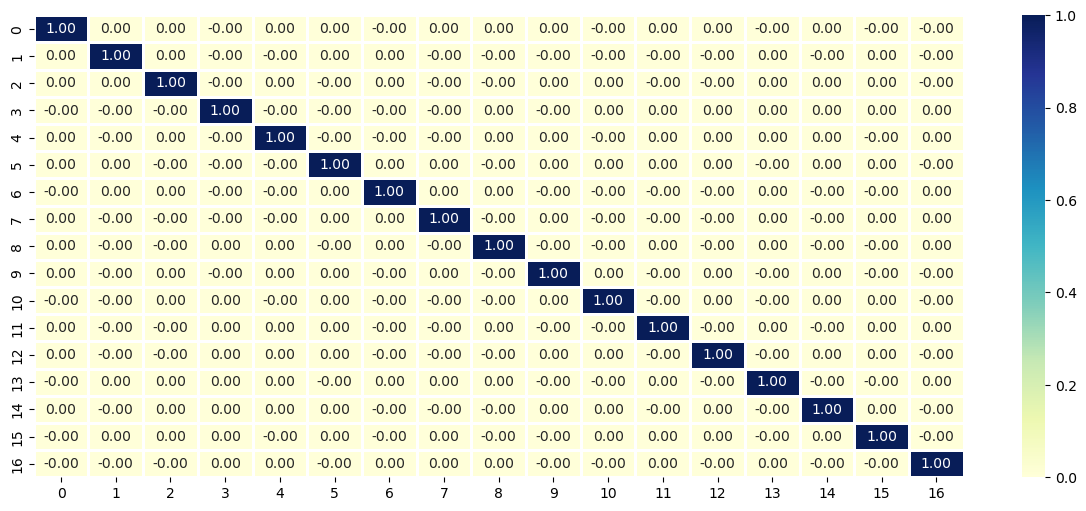

In [937]:
corrmat = np.corrcoef(pca_final.T)
plt.figure(figsize=[15,6])
sns.heatmap(corrmat, fmt = ".2f",annot=True,lw=1,cmap = 'YlGnBu')

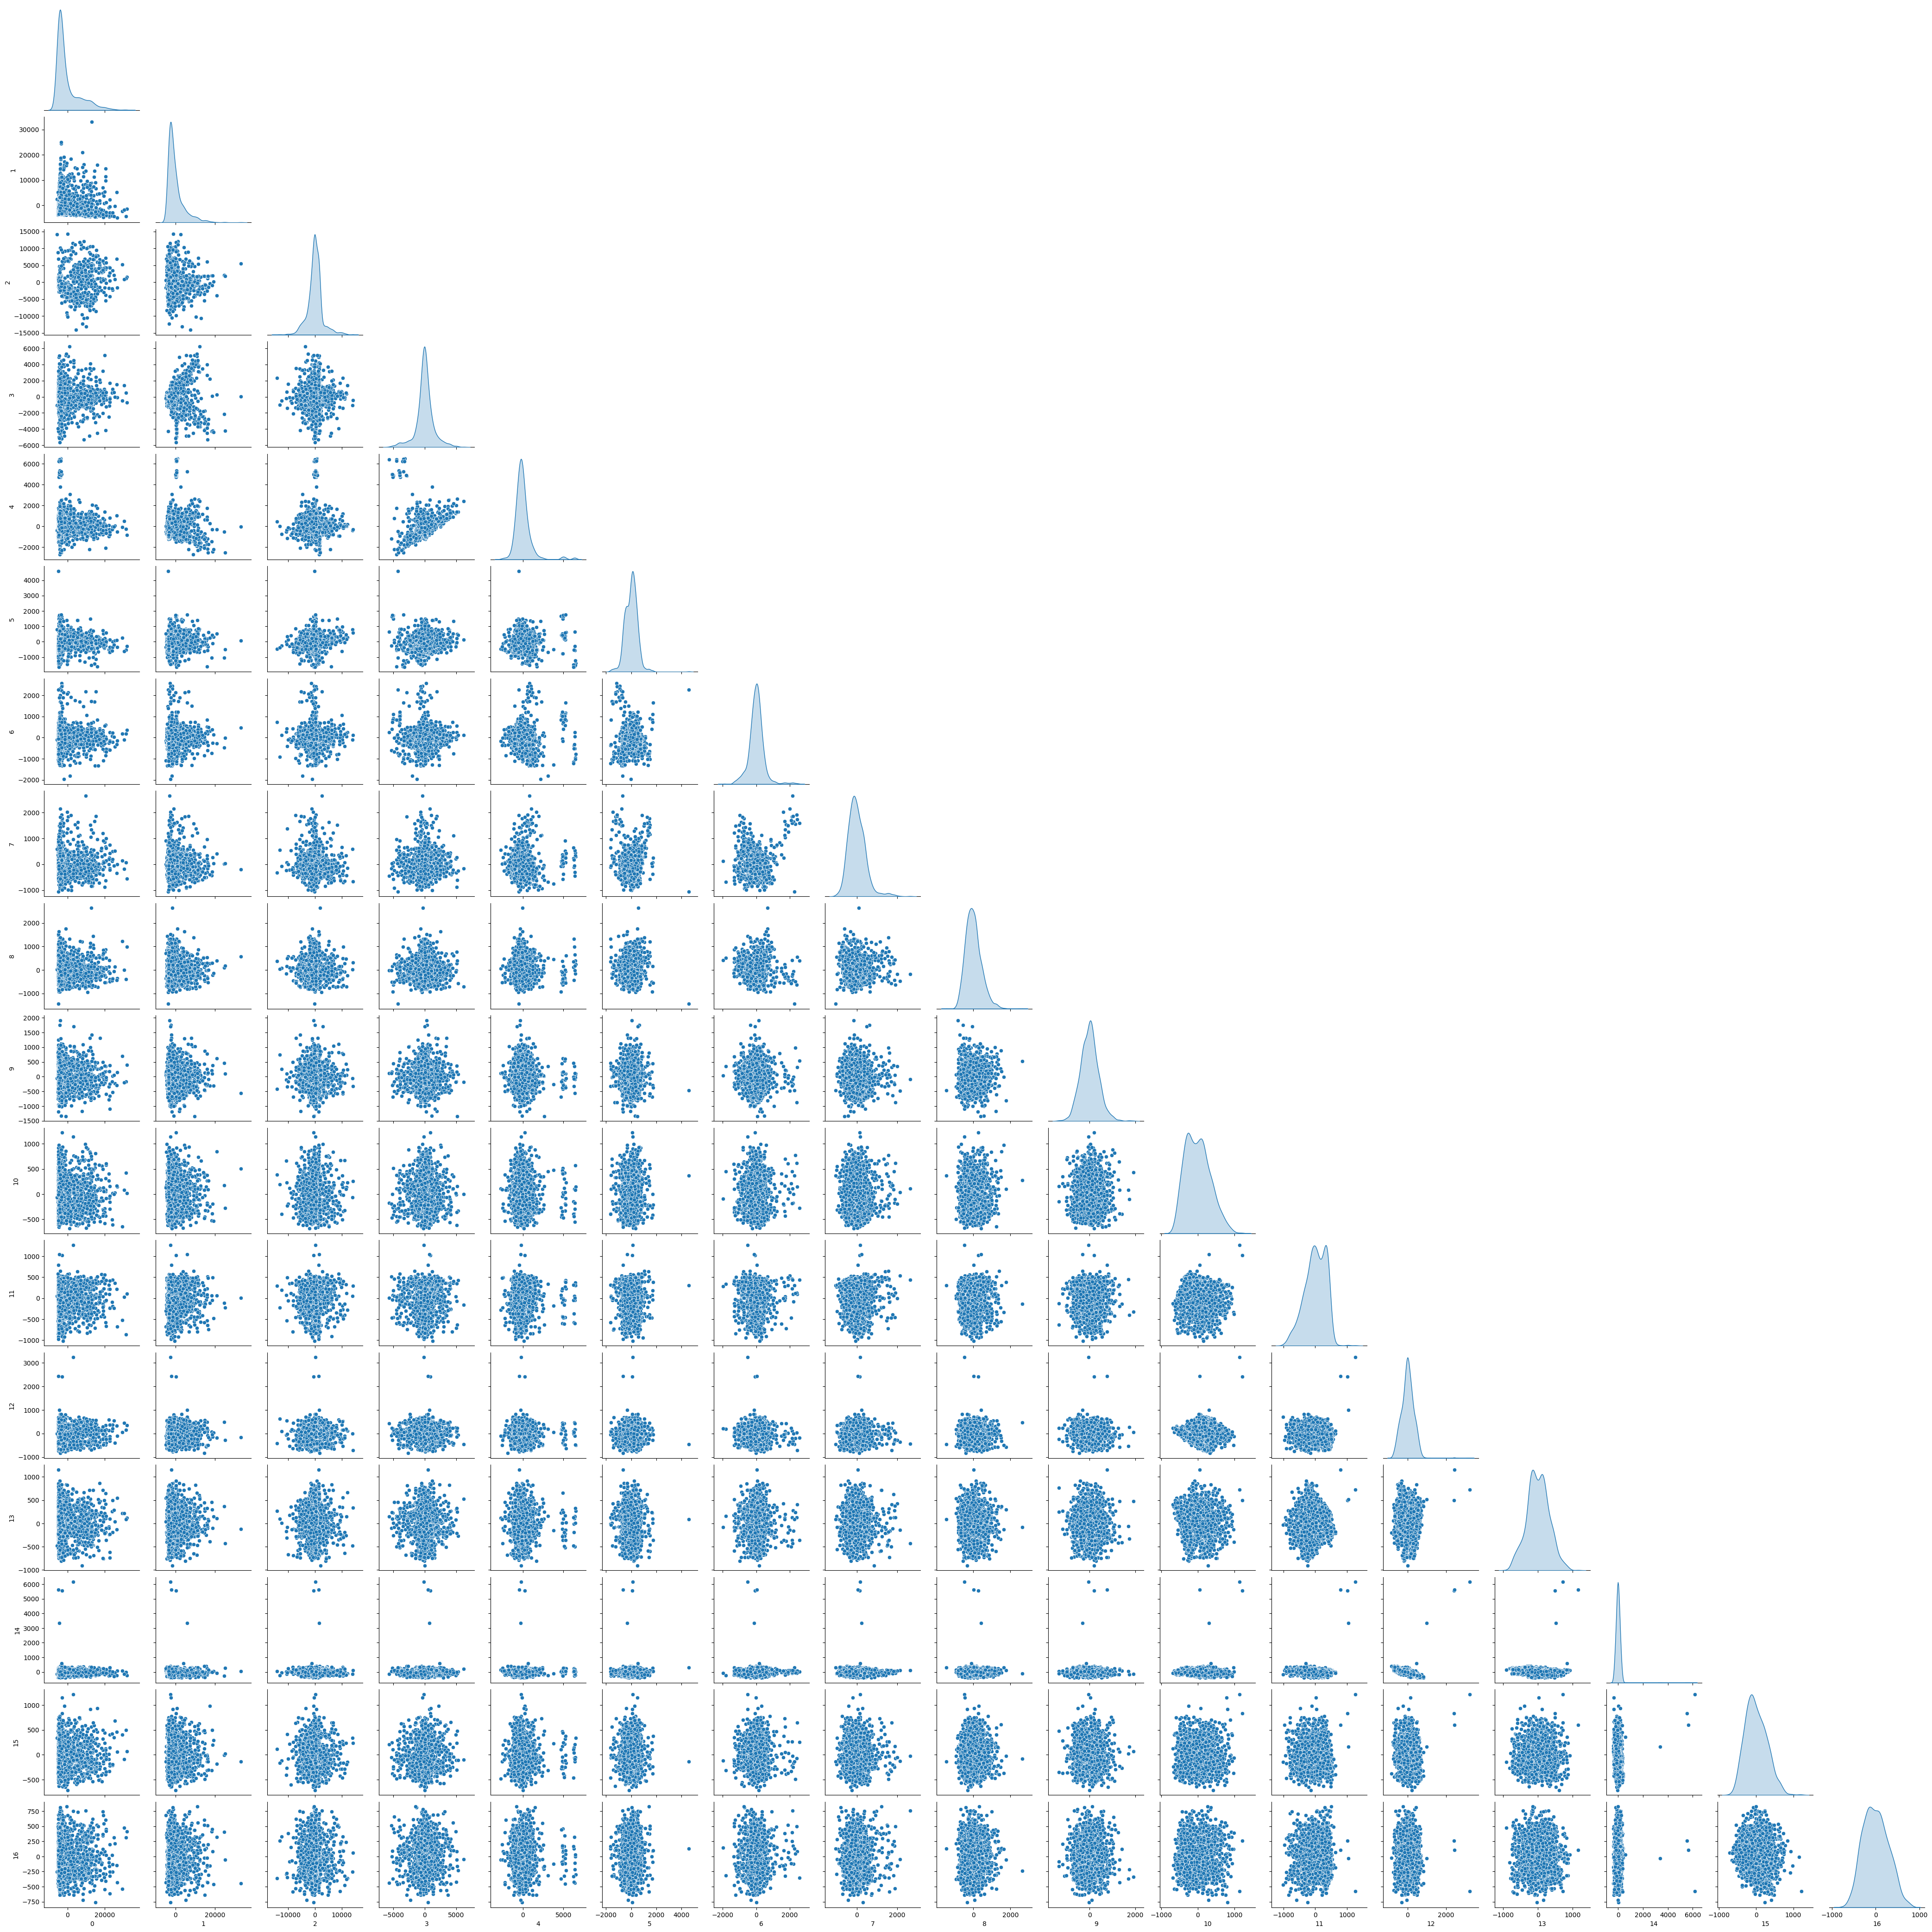

In [938]:
sns.pairplot(pd.DataFrame(pca_final),diag_kind = 'kde',corner=True)

In [941]:
scaler = StandardScaler()
scaler.fit(pca_final)
X = scaler.transform(pca_final)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (1253, 17)
y_train shape:  (1253,)
x_test shape:  (314, 17)
y_test shape:  (314,)


In [942]:
gs_nb = GaussianNB()

gs_nb.fit(x_train, y_train.ravel())

train_predict = gs_nb.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

test_predict = gs_nb.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))

Model Accuracy with Train Data: 0.9098

Model Accuracy with Test Data: 0.9140


In [944]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       293
           1       0.12      0.05      0.07        21

    accuracy                           0.91       314
   macro avg       0.53      0.51      0.51       314
weighted avg       0.88      0.91      0.90       314



Precision – What percent of your predictions were correct Recall – What percent of the positive cases did you catch F1 score – What percent of positive predictions were correct support is the number of occurence of the given class in your dataset

For Pass, We have 93% predictions(Precision) correct and able to caught 98%(Recall) positive cases correctly and 95%(F1 Score) of postive predictions are correct

For Fail, We have 12% predictions(Precision) correct and able to caught 05%(Recall) positive cases correctly and 7%(F1 Score) of postive predictions are correct

Support numbers- For every 314 occurences we have 293 Pass occurances 21 Fail occurances

Overall accuracy is 91%

0.9377494014365523
0.9299363057324841
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.49829351535836175

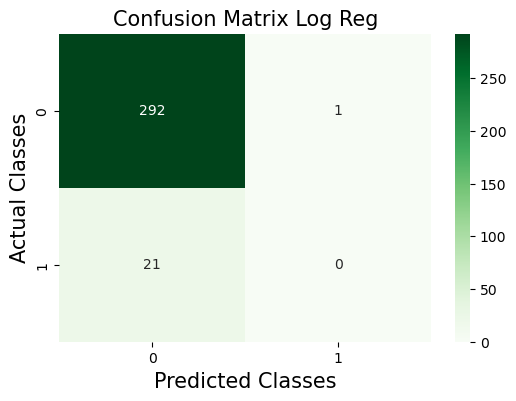

In [947]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

class_train_predict = dTreeR.predict(x_test)
class_test_predict = dTreeR.predict(x_test)
cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

y_pred = dTreeR.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

1.0
0.9299363057324841
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.49829351535836175

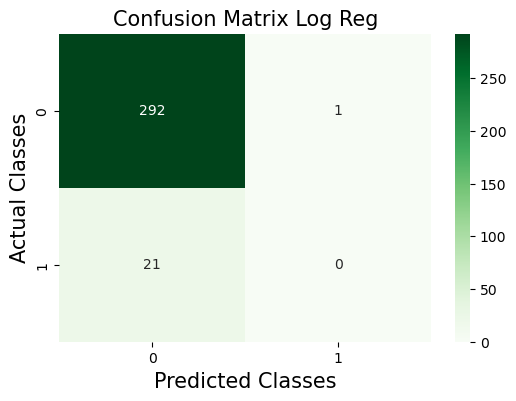

In [948]:
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(x_train, y_train)

class_train_predict = rfcl.predict(x_test)
class_test_predict = rfcl.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test, y_test))

y_pred = rfcl.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

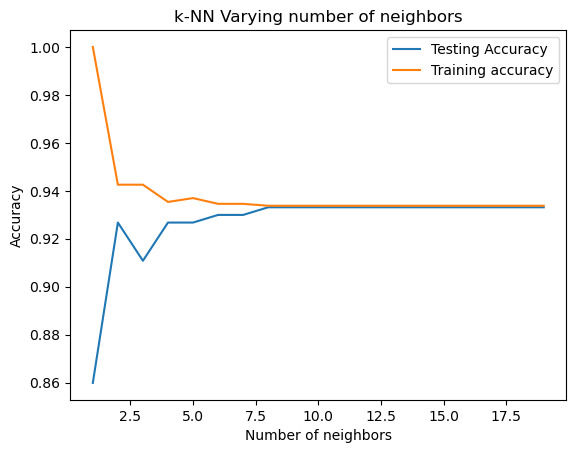

In [949]:
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test) 
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

0.9345570630486831
0.9299363057324841
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.49829351535836175

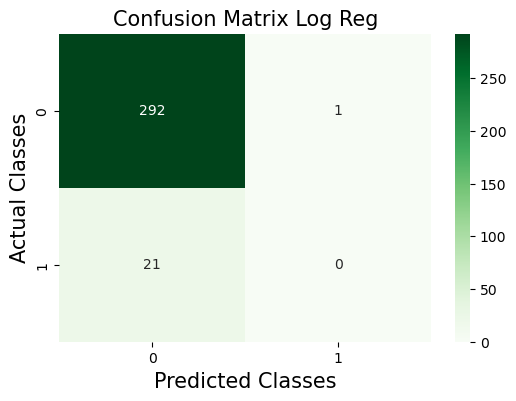

In [953]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

class_train_predict = knn.predict(x_test)
class_test_predict = knn.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9098164405426975
0.9140127388535032
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       293
           1       0.12      0.05      0.07        21

    accuracy                           0.91       314
   macro avg       0.53      0.51      0.51       314
weighted avg       0.88      0.91      0.90       314



0.5118641313180562

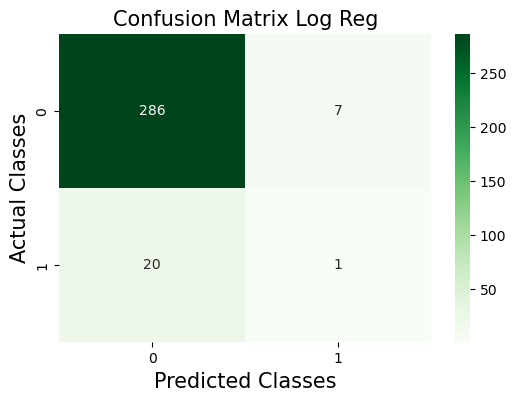

In [954]:
nb = GaussianNB()

nb.fit(x_train, y_train.ravel())

class_train_predict = nb.predict(x_test)
class_test_predict = nb.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(nb.score(x_train, y_train))
print(nb.score(x_test, y_test))

y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9337589784517158
0.9331210191082803
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.5

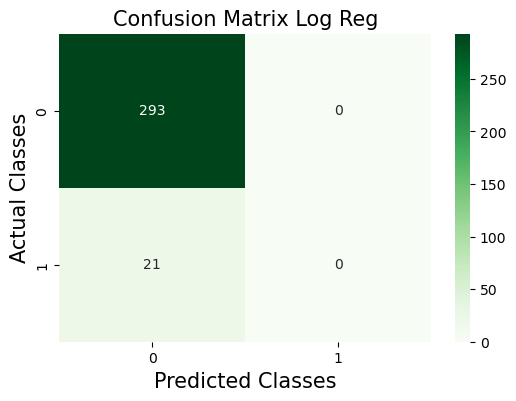

In [956]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)


class_train_predict = lr.predict(x_test)
class_test_predict = lr.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9353551476456504
0.9331210191082803
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.5

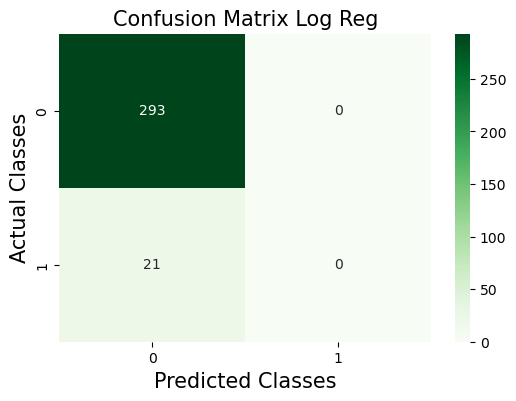

In [957]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)

class_train_predict = svc.predict(x_test)
class_test_predict = svc.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))

y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9345570630486831
0.9331210191082803
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.5

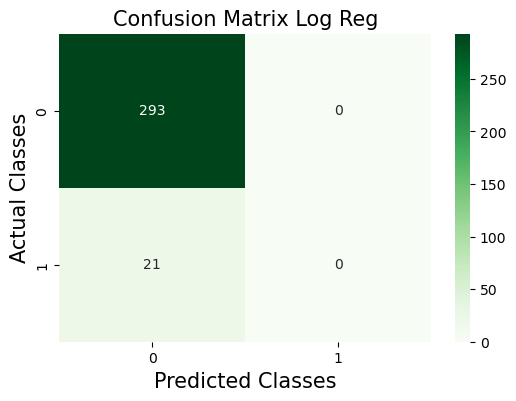

In [958]:
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

class_train_predict = abcl.predict(x_test)
class_test_predict = abcl.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(abcl.score(x_train, y_train))
print(abcl.score(x_test, y_test))

y_pred = abcl.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9449321628092577
0.9331210191082803
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



0.5

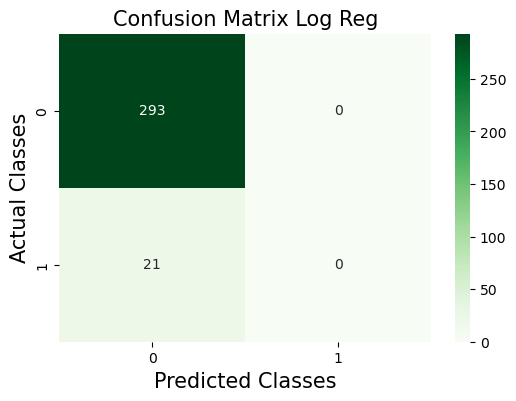

In [959]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

class_train_predict = gbcl.predict(x_test)
class_test_predict = gbcl.predict(x_test)

cm=confusion_matrix(y_test, class_test_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

print(gbcl.score(x_train, y_train))
print(gbcl.score(x_test, y_test))

y_pred = gbcl.predict(x_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve

Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

From above we can observe Logistic Regression and SVM acheived best test accuracies. Logistic regression fitted closely.

Naive bayes also achieved best result bit lower than logistc regression accuracy.ROC AUC score for Naive bayes is high among all models.

But Logistic regression achieved high accuracy. So Best model is Logic regression

In [960]:
def GetModel():
    basedModels = []
    basedModels.append(('DT' , DecisionTreeClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    
    return basedModels

In [965]:
def EvalModel(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 20
    SEED = 7
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
        print(msg)
        
    return names, results

In [966]:
models = GetModel()
names,results = EvalModel(x_train, y_train,models)

DT: 86.033026 (3.182557)
RF: 93.218126 (0.835645)
KNN: 93.058116 (1.151996)
NB: 90.745008 (2.825121)
LR: 93.297491 (0.618670)
SVM: 93.376856 (0.553676)
AB: 92.658730 (1.901702)
GBM: 92.978751 (1.041325)


In [968]:
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)

lr_rand = RandomizedSearchCV(estimator = lr, 
                 param_distributions=hyperparameters, 
                 cv=10,  
                 verbose=1, 
                 scoring='accuracy')

lr_rand.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000165CE11B850>,
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=1)

In [970]:
print('Logistic Regression - Best Parameters: ',lr_rand.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.22460192895652042, 'penalty': 'l1'}


In [972]:
lrtrain_predict = lr_rand.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, lrtrain_predict)))
print()

lrtest_predict = lr_rand.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, lrtest_predict)))

Model Accuracy with Train Data: 0.9338

Model Accuracy with Test Data: 0.9331


Q6 C - Pickle the selected model for future use. 

In [974]:
import pickle
saved_model = pickle.dumps(lr_rand)
lr_from_pickle = pickle.loads(saved_model)

In [975]:
with open('WF_Final.pkl', 'wb') as fid:
    pickle.dump(lr_rand, fid)

In [976]:
WF_Final = pickle.load(open('WF_Final.pkl', 'rb'))

In [985]:
fdata=pd.read_csv(r'C:\Personal\AI\Featurization\Future_predictions.csv')

In [986]:
f_data=fdata.iloc[:,1:]

In [987]:
print("shape is",fdata.shape)
print("size is ",fdata.size)

shape is (1567, 592)
size is  927664


In [990]:
total_cells = np.product(signal.shape)
total_missing = signal.isnull().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
            ... 
583          0.0
586          0.0
587          0.0
589          0.0
Pass/Fail    0.0
Length: 215, dtype: float64

In [991]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
f_data = pd.DataFrame(my_imputer.fit_transform(fdata.iloc[:,1:591]))

In [992]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 7.1 MB


In [993]:
scaler = StandardScaler()
scaler.fit(f_data)
f_scale = scaler.transform(f_data)

pca = PCA(n_components=17)  #specifying 11 PC components
final=pca.fit_transform(f_scale)

In [994]:
final.shape

(1567, 17)

In [995]:
WF_Final.predict(final)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

conclusion on the results.
Worked on dataset which is having

RangeIndex: 1567 entries, 0 to 1566 Columns: 592 entries, Time to Pass/Fail

Performed EDA ,checked for zzero varaince and removed all highly correltead features. Trained all supervised models. Cross validated scores with CV techniques and hypertuned parmaeters. Naive Bayes achieved hih accuracy results.

Peformed PCA to reduce dimensioanlity reduction and reduced final features to 17.

Trained all supervised models. Cross validated scores with CV techniques and hypertuned parmaeters.

LOgistic regression achieved high accuracy results.

Pickled the model for future use and then used future dataset to predcit the pass/Fail values.